In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [4]:
mnist_train = datasets.MNIST(root = "./dataset", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root = "./dataset", train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = 100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = 100, shuffle = False)

In [4]:
input_size = 784
hidden_size = [128,64]
output_size = 10

model = nn.Sequential(
    nn.Linear(input_size, hidden_size[0]),
    nn.ReLU(),
    nn.Linear(hidden_size[0], hidden_size[1]),
    nn.ReLU(),
    nn.Linear(hidden_size[1], output_size),
    nn.ReLU(),
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.09)

epoch = 30
for e in range(epoch) :
    running_loss = 0;
    for images, labels in train_loader :
        images = images.view(images.shape[0], 784)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print("Epoch %f : Training loss %f" %(e, running_loss/len(train_loader)))



Epoch 0.000000 : Training loss 0.936180
Epoch 1.000000 : Training loss 0.491885
Epoch 2.000000 : Training loss 0.424596
Epoch 3.000000 : Training loss 0.384934
Epoch 4.000000 : Training loss 0.359876
Epoch 5.000000 : Training loss 0.342179
Epoch 6.000000 : Training loss 0.327953
Epoch 7.000000 : Training loss 0.169432
Epoch 8.000000 : Training loss 0.084241
Epoch 9.000000 : Training loss 0.073026
Epoch 10.000000 : Training loss 0.063796
Epoch 11.000000 : Training loss 0.056731
Epoch 12.000000 : Training loss 0.050871
Epoch 13.000000 : Training loss 0.045672
Epoch 14.000000 : Training loss 0.040756
Epoch 15.000000 : Training loss 0.036561
Epoch 16.000000 : Training loss 0.032588
Epoch 17.000000 : Training loss 0.028992
Epoch 18.000000 : Training loss 0.026692
Epoch 19.000000 : Training loss 0.023938
Epoch 20.000000 : Training loss 0.020840
Epoch 21.000000 : Training loss 0.018841
Epoch 22.000000 : Training loss 0.016909
Epoch 23.000000 : Training loss 0.014958
Epoch 24.000000 : Training

In [5]:
torch.save(model,"MNIST.pt")

tensor([[ 0.0000,  0.0000,  0.0595,  7.0734,  0.0000,  0.0000,  0.0000, 17.2742,
          0.0000,  3.4165]], grad_fn=<ReluBackward0>)


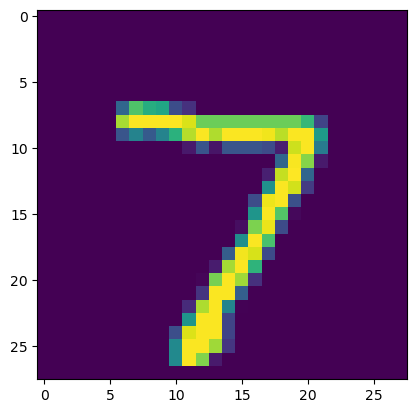

In [5]:
F = torch.load("MNIST.pt", weights_only = False)

img = mnist_test[0][0].reshape(28,28)
plt.imshow(img)

y_array = F(img.reshape(1,28*28))
print(( y_array))


In [6]:
cnt = 0;
err = []

for i in range(len(mnist_test)) :
    x = mnist_test[i][0].reshape(1,28*28)
    t = mnist_test[i][1]
    y = F(x)
    if torch.argmax(y) == t :
        cnt = cnt + 1
    else :
        err.append(i)

print("correct_posibility : %f" %(cnt / len(mnist_test)))
print(err)
        

correct_posibility : 0.978700
[62, 149, 247, 321, 340, 381, 445, 449, 495, 528, 543, 582, 583, 646, 659, 691, 720, 844, 882, 938, 947, 951, 956, 999, 1014, 1039, 1112, 1128, 1178, 1181, 1182, 1194, 1224, 1226, 1232, 1242, 1247, 1253, 1299, 1319, 1328, 1337, 1393, 1494, 1500, 1522, 1530, 1531, 1549, 1553, 1554, 1569, 1601, 1609, 1621, 1670, 1681, 1717, 1790, 1800, 1901, 1941, 1952, 1984, 1987, 2004, 2040, 2053, 2109, 2130, 2135, 2182, 2272, 2293, 2369, 2387, 2414, 2426, 2488, 2560, 2607, 2610, 2618, 2648, 2654, 2877, 2896, 2921, 2927, 2939, 2953, 3060, 3073, 3117, 3225, 3405, 3422, 3451, 3475, 3503, 3520, 3558, 3597, 3681, 3727, 3757, 3767, 3776, 3808, 3811, 3818, 3838, 3853, 3869, 3893, 3906, 3941, 3943, 3985, 4000, 4065, 4078, 4176, 4193, 4199, 4201, 4248, 4289, 4294, 4344, 4369, 4425, 4497, 4534, 4536, 4547, 4601, 4639, 4731, 4761, 4807, 4823, 4833, 4876, 4880, 4956, 4966, 4990, 5199, 5331, 5457, 5495, 5600, 5642, 5734, 5842, 5887, 5936, 5937, 5955, 5972, 5973, 5982, 6023, 6045, 6059